In [45]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md

In [46]:


import os
# change python directory to /home/gmh4/projects/CompLab/comp-lab-class
os.chdir('../Analysis/')

# top file is ../Data/1hz3_T310.start.nowater.gro
# trajectory file is ../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc
# load the trajectory
traj = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

In [47]:
sunflowerzy_file= np.loadtxt('../Data/1hz3_T310.run.25000000.energy.xvg', skiprows=29, dtype=float)

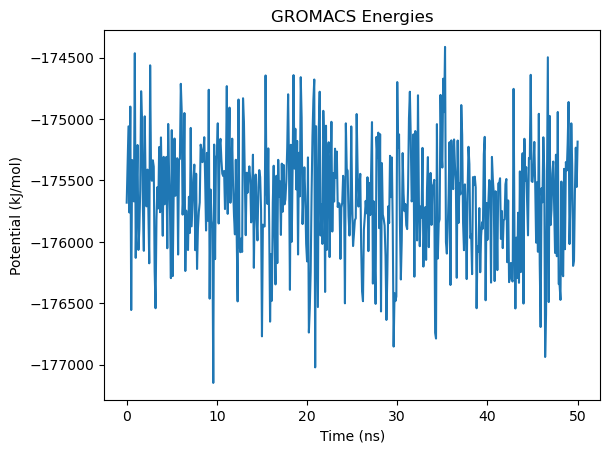

In [48]:
plt.plot(sunflowerzy_file[:,0]/1000, sunflowerzy_file[:,1])
# make this plot look nice
plt.xlabel('Time (ns)')
plt.ylabel('Potential (kJ/mol)')
plt.title('GROMACS Energies')
plt.show()

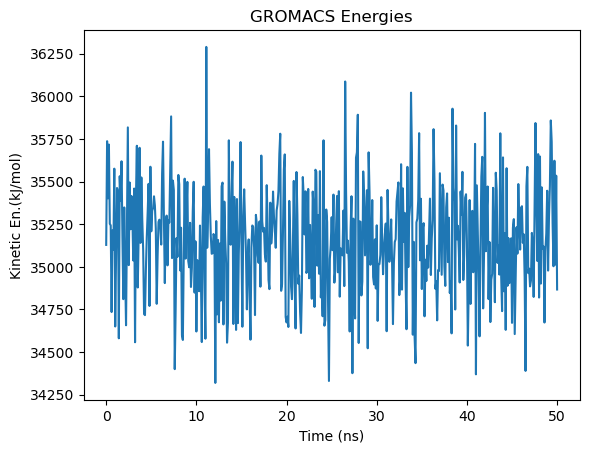

In [5]:
plt.plot(sunflowerzy_file[:,0]/1000, sunflowerzy_file[:,2])
# make this plot look nice
plt.xlabel('Time (ns)')
plt.ylabel('Kinetic En.(kJ/mol)')
plt.title('GROMACS Energies')
plt.show()

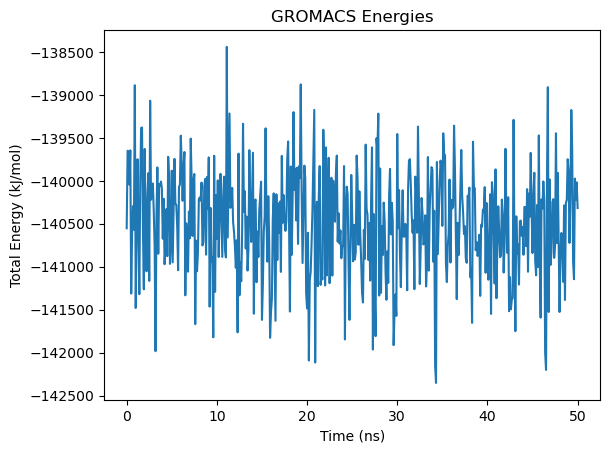

In [6]:
plt.plot(sunflowerzy_file[:,0]/1000, sunflowerzy_file[:,3])
# make this plot look nice
plt.xlabel('Time (ns)')
plt.ylabel('Total Energy (kJ/mol)')
plt.title('GROMACS Energies')
plt.show()

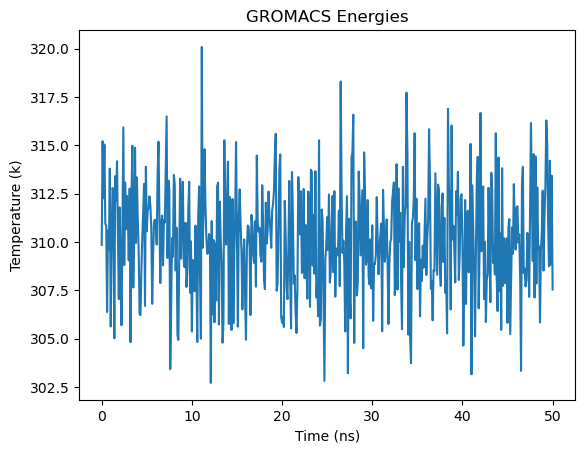

In [7]:
plt.plot(sunflowerzy_file[:,0]/1000, sunflowerzy_file[:,4])
# make this plot look nice
plt.xlabel('Time (ns)')
plt.ylabel('Temperature (k)')
plt.title('GROMACS Energies')
plt.show()

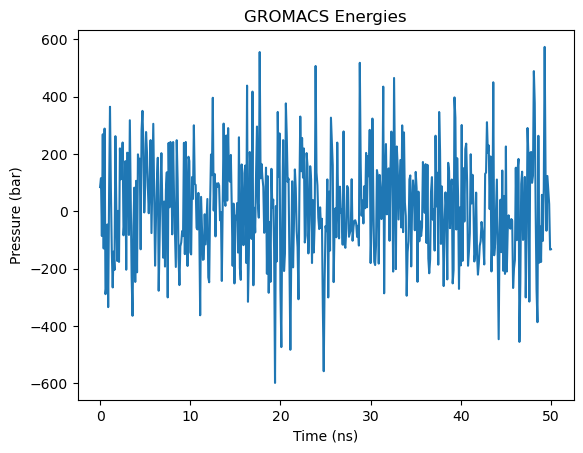

In [8]:
plt.plot(sunflowerzy_file[:,0]/1000, sunflowerzy_file[:,5])
# make this plot look nice
plt.xlabel('Time (ns)')
plt.ylabel('Pressure (bar)')
plt.title('GROMACS Energies')
plt.show()

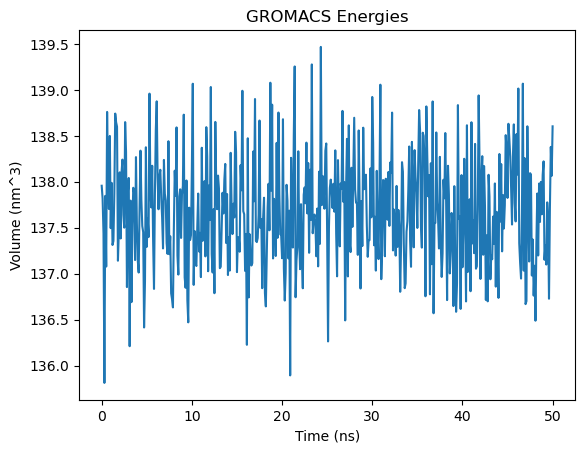

In [9]:
plt.plot(sunflowerzy_file[:,0]/1000, sunflowerzy_file[:,6])
# make this plot look nice
plt.xlabel('Time (ns)')
plt.ylabel('Volume (nm^3)')
plt.title('GROMACS Energies')
plt.show()

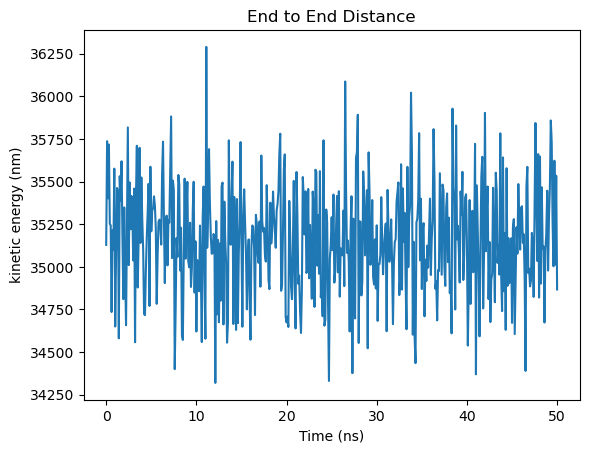

In [10]:
plt.plot(sunflowerzy_file[:,0]/1000, sunflowerzy_file[:,2])
# make this plot look nice
plt.xlabel('Time (ns)')
plt.ylabel('kinetic energy (nm)')
plt.title('End to End Distance')
plt.show()


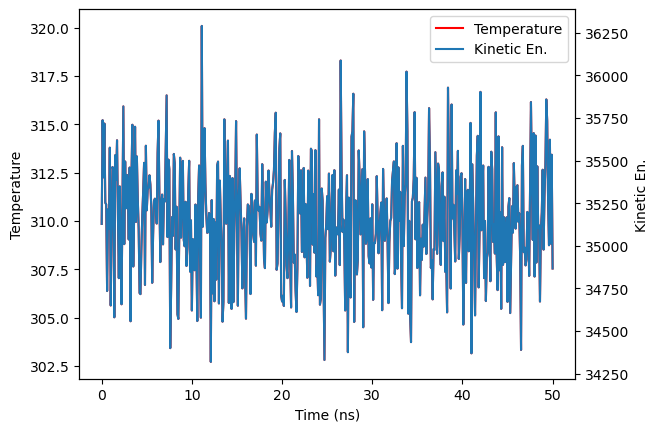

In [14]:

fig = plt.figure()
ax_left = fig.add_subplot(111)
line_T = ax_left.plot(sunflowerzy_file[:,0]/1000, sunflowerzy_file[:,4], '-r', label="Temperature")

ax_right = ax_left.twinx()
line_E = ax_right.plot(sunflowerzy_file[:,0]/1000, sunflowerzy_file[:,2], label="Kinetic En.")

ax_left.legend(line_T + line_E, ["Temperature", "Kinetic En."], loc=0)

ax_left.set_xlabel('Time (ns)')
ax_left.set_ylabel('Temperature')
ax_right.set_ylabel('Kinetic En.')

plt.show()

In [30]:
sunflowerzy_file=md.load('../Data/1UBQ_processed.pdb')

In [31]:
hydrogen_bonds=md.baker_hubbard(sunflowerzy_file)
print(len(hydrogen_bonds))

57


In [32]:
# Compute Dictionary of protein secondary structure secondary structure assignments
protein_2Dstructure=md.compute_dssp(sunflowerzy_file,simplified=True)
helical_amino_acids=np.sum(protein_2Dstructure=='H')
print(helical_amino_acids)

18


In [33]:
traj = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

In [52]:

# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
end_end(traj)

#plot distance vs time
#plt.plot(traj.time, dist)



array([2.4080002, 2.294153 , 2.4405324, 2.3514538, 2.8238873, 3.389765 ,
       2.9046328, 2.9567354, 3.0590065, 4.125036 , 3.451251 , 3.3695395,
       2.1477714, 2.0729964, 2.562689 , 2.211393 , 2.233543 ],
      dtype=float32)

In [49]:
# Calculate end-to-end distance at each time step
def end_to_end_distance(traj):
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

end_to_end_distance(traj)
#plt.plot(traj.time, dist)


array([2.4080002, 2.294153 , 2.4405324, 2.3514538, 2.8238873, 3.389765 ,
       2.9046328, 2.9567354, 3.0590065, 4.125036 , 3.451251 , 3.3695395,
       2.1477714, 2.0729964, 2.562689 , 2.211393 , 2.233543 ],
      dtype=float32)

In [60]:
# Calculate radius of gyration at each time step
#def radius_of_gyration(traj):
#    center_of_mass = np.mean(traj, axis=0)
#    squared_distances = np.sum((traj - center_of_mass)**2, axis=1)
#    rg = np.sqrt(np.mean(squared_distances))
#    return rg

#radii_of_gyration = [radius_of_gyration(sunflowerzy_file[:i+1]) for i in range(len(sunflowerzy_file))]

md.compute_rg(traj)



array([0.85057444, 1.00091706, 1.00509146, 0.9700538 , 1.03096215,
       1.08965024, 1.06154491, 1.01728751, 1.0467843 , 1.25890696,
       1.03388204, 1.18969875, 1.03686539, 1.03002704, 1.00622438,
       1.02566947, 1.03948413])

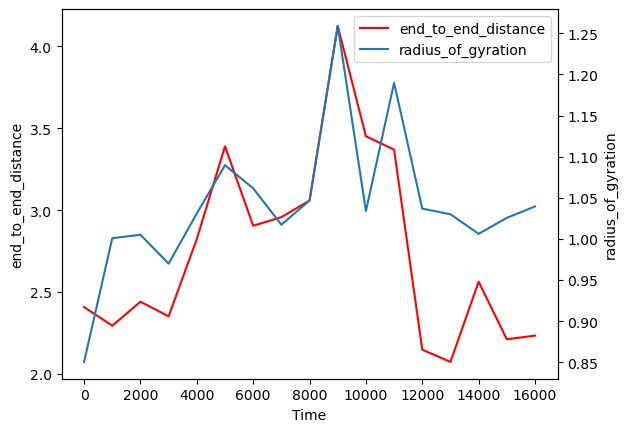

In [58]:

fig = plt.figure()
ax_left = fig.add_subplot(111)
line_T = ax_left.plot(traj.time, end_to_end_distance(traj), '-r', label="end_to_end_distance")

ax_right = ax_left.twinx()

line_E = ax_right.plot(traj.time, md.compute_rg(traj), label="radius_of_gyration")

ax_left.legend(line_T + line_E, ["end_to_end_distance", "radius_of_gyration"], loc=0)

ax_left.set_xlabel('Time')
ax_left.set_ylabel('end_to_end_distance')
ax_right.set_ylabel('radius_of_gyration')

plt.show()

Text(0.5, 0, 'end-end distance')

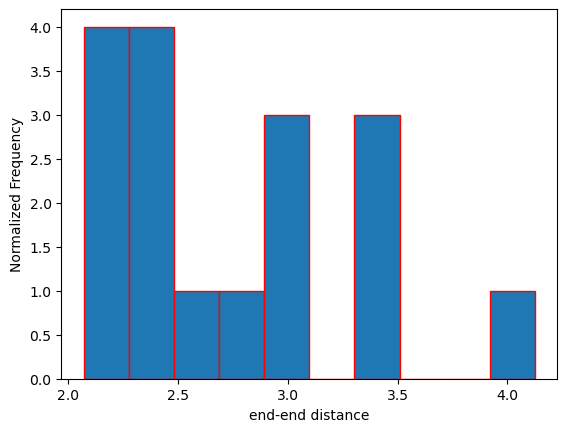

In [61]:
plt.hist(dist,edgecolor='r')
plt.ylabel('Normalized Frequency')
plt.xlabel('end-end distance')

Text(0.5, 0, 'radius of gyration')

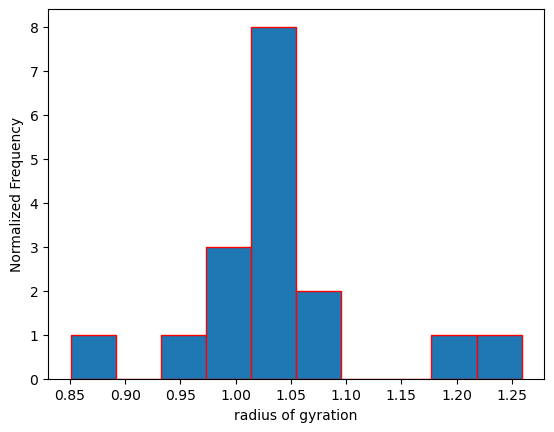

In [63]:
plt.hist(md.compute_rg(traj),edgecolor='r')
plt.ylabel('Normalized Frequency')
plt.xlabel('radius of gyration')